# Overcoming a Theoretical Limitation of Self-Attention 

Replication of experiments on FIRST language learning from [Overcoming a Theoretical Limitation of Self-Attention  (Chiang and Cholak, 2022)](https://arxiv.org/pdf/2202.12172.pdf).

In [1]:
import sys 
sys.path.append('../')
from src.transformer import PalindromeTransformer
import torch

## Learning FIRST

Define training parameters as in the original paper. Citing from (David Chiang and Peter Cholak, 2020):
> We used `d_model` = 16 for word encodings, self-attention, and FFNN outputs, and `d_FFNN` = 64 for FFNN hidden layers. We used layer normalization (ε = 10^−5) after residual connections. We used PyTorch’s default initialization and trained using Adam (Kingma and Ba, 2015) with learning rate 3 × 10^−4 (Karpathy, 2016). We did not use dropout, as it did not seem to help.

In [2]:
vocab = ["0", "1", "$"]

epochs = 100
layers = 2
heads = 1 
d_model = 16
d_ffnn = 64  
eps = 1e-5 # value added to denominator in layer normalization
scaled = False

### Generalization experiment

Initialize the Transformer to learn FIRST.

In [3]:
transformer = PalindromeTransformer(len(vocab), layers, heads, d_model, d_ffnn, scaled, eps)
optim = torch.optim.Adam(transformer.parameters(), lr=0.0003)

Define model trainer and train the transformer.

In [4]:
from src.trainer import Trainer
from src.dataset import Dataset

trainset = Dataset(0, 100, 10, random_seed=42, train=True, data_type='palindrome', variable_lenght=False)
testset = Dataset(0, 100, 100,  random_seed=42,  train=False, data_type='palindrome', variable_lenght=False)

trainer = Trainer(0, transformer, optim, vocab, epochs, trainset, testset, verbose=1)
train_l, val_l, train_acc, val_acc = trainer.train()

[Epoch 1] Train acc: 0.49 Train loss: 71.34279257059097, Test acc: 0.53 Test loss: 69.77437853813171
[Epoch 2] Train acc: 0.6 Train loss: 68.1231017112732, Test acc: 0.46 Test loss: 77.75594788789749
[Epoch 3] Train acc: 0.38 Train loss: 71.91137421131134, Test acc: 0.46 Test loss: 70.07644945383072
[Epoch 4] Train acc: 0.51 Train loss: 71.15356880426407, Test acc: 0.49 Test loss: 69.97277271747589
[Epoch 5] Train acc: 0.48 Train loss: 69.83935052156448, Test acc: 0.51 Test loss: 69.36313569545746
[Epoch 6] Train acc: 0.54 Train loss: 69.460533618927, Test acc: 0.56 Test loss: 68.66773736476898
[Epoch 7] Train acc: 0.53 Train loss: 69.67031335830688, Test acc: 0.41 Test loss: 70.50609093904495
[Epoch 8] Train acc: 0.47 Train loss: 69.80607396364212, Test acc: 0.52 Test loss: 69.32815116643906
[Epoch 9] Train acc: 0.54 Train loss: 70.10240322351456, Test acc: 0.5 Test loss: 69.52452141046524
[Epoch 10] Train acc: 0.55 Train loss: 69.03684830665588, Test acc: 0.54 Test loss: 69.049601495

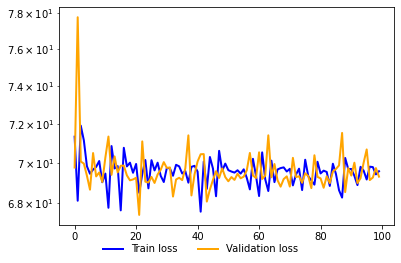

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(range(epochs), train_l, color='blue', lw=2, label="Train loss")
plt.plot(range(epochs), val_l, color='orange', lw=2, label="Validation loss")
plt.yscale('log')
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, frameon=False, loc='lower center',  ncol=4)
plt.show()

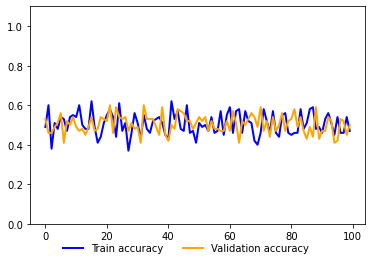

In [6]:
fig = plt.figure()
plt.plot(range(epochs), train_acc, color='blue', lw=2, label="Train accuracy")
plt.plot(range(epochs), val_acc, color='orange', lw=2, label="Validation accuracy")
plt.ylim([0, 1.1])

ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, frameon=False, loc='lower center',  ncol=4)
plt.show()